In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
print(titanic.head(10))

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

# Dataset Explaination

In [ ]:
# Basic Info about dataset
print(titanic.info())

In [ ]:
# Descriptive Statistics
print(titanic.describe())

In [ ]:
# Print minimum and maximum age
print(f'Minimum : {titanic['age'].min()} Yrs')
print(f'Maximum : {titanic['age'].max()} Yrs')

In [ ]:
# Find Null Values
titanic.isnull().sum()

In [ ]:
# Rows which has null values regarding age
age = titanic[titanic['age'].isnull()]
temp1 = age.copy() # to record a copy original nan age
print(temp1)

In [ ]:
# Rows which has null values regarding embarked
embark = titanic[titanic['embarked'].isnull()]
temp2 = embark.copy() # to record a copy original nan age
print(temp2)

# Data Cleaning : Handle missing values of 'age' and 'embarked'

In [4]:
titanic['age'].fillna(titanic['age'].mean(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_2952\352066167.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].mean(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_2952\352066167.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For


Compare Age

In [ ]:
data = {'old_age':[], 'new_age':[]}
df = pd.DataFrame(data)

for i in temp1.index:
    df.loc[i, 'old_age'] = temp.loc[i, 'age']
    df.loc[i, 'new_age'] = titanic.loc[i, 'age']

In [ ]:
df

Now Embark

In [ ]:
data = {'old_embark':[], 'new_embark':[]}
df = pd.DataFrame(data)

for i in temp2.index:
    df.loc[i, 'old_embark'] = temp.loc[i, 'embarked']
    df.loc[i, 'new_embark'] = titanic.loc[i, 'embarked']

In [ ]:
df

In [ ]:
# EDA Visualization

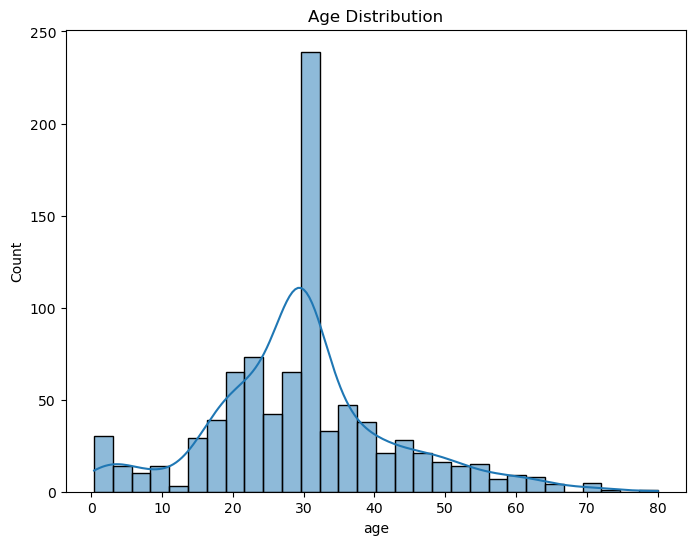

In [5]:
# 1. Distribution of age
plt.figure(figsize=(8,6))
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

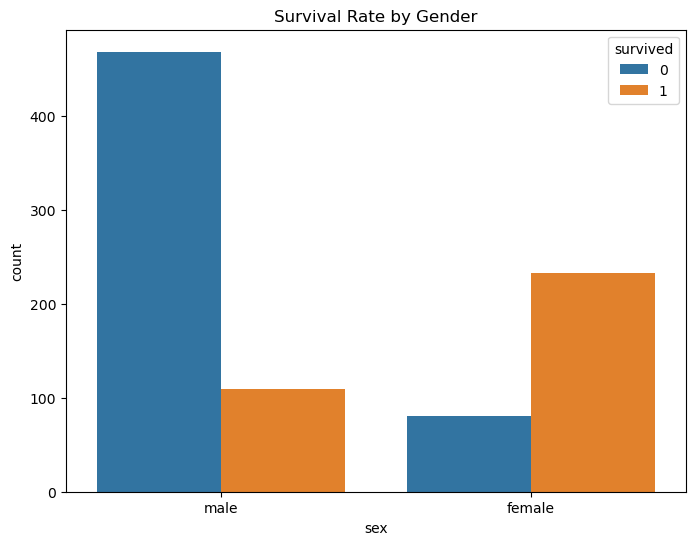

In [6]:
# 2. Survival Rate by Gender
plt.figure(figsize=(8,6))
sns.countplot(data=titanic, x='sex', hue='survived')
plt.title('Survival Rate by Gender')
plt.show()

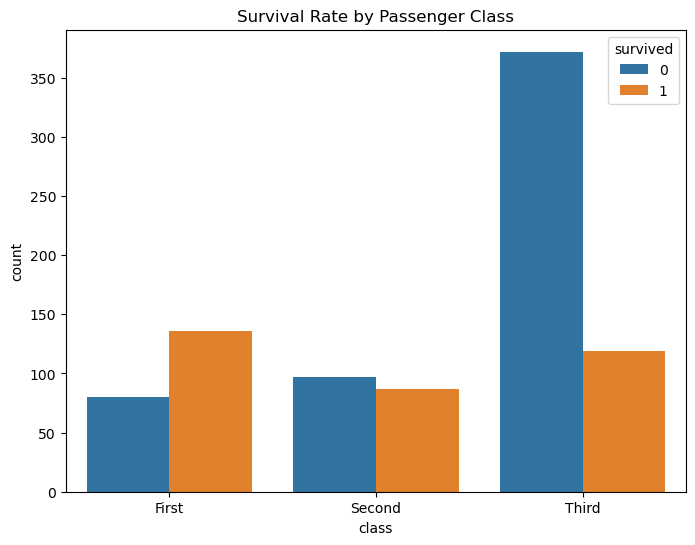

In [7]:
# 3. Survival Rate by Passenger Class
plt.figure(figsize=(8,6))
sns.countplot(data=titanic, x='class', hue='survived')
plt.title('Survival Rate by Passenger Class')
plt.show()

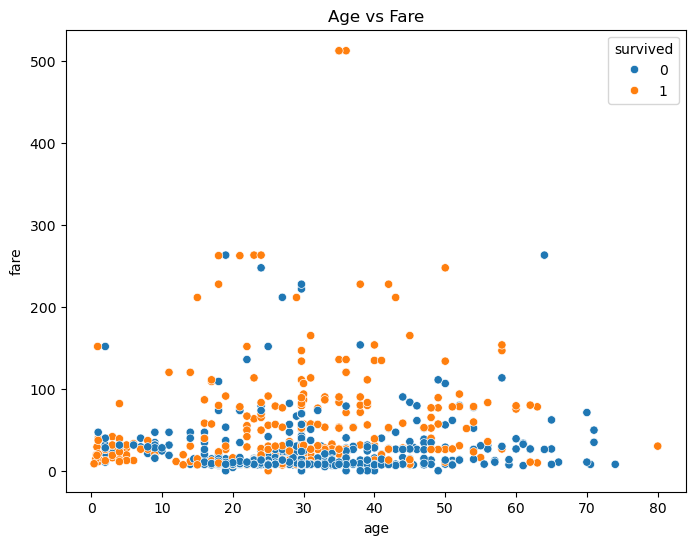

In [8]:
# 4. Age vs Fare
plt.figure(figsize=(8,6))
sns.scatterplot(data=titanic, x='age', y='fare', hue='survived')
plt.title('Age vs Fare')
plt.show()

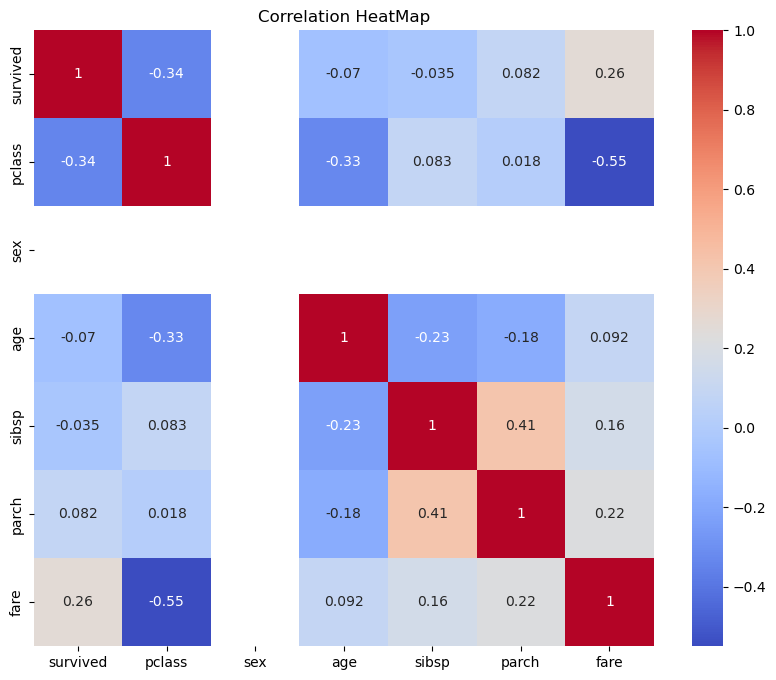

In [11]:
# 4. Correlation HeatMap
plt.figure(figsize=(10,8))
titanic['sex'] = titanic['sex'].map({'male':0, 'female':1})
numeric_titanic = titanic.select_dtypes(include=['number'])
sns.heatmap(numeric_titanic.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation HeatMap')
plt.show()

In [ ]:
# Insights: Calculate the Survival Rate
survival_rate = titanic['survived'].mean()
print(f'Overall Survival Rate : {survival_rate*100:.2f}%')